<a href="https://colab.research.google.com/github/Papareddy-saketh/Airbnb-SDA/blob/main/Airbnb_XG_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import LabelEncoder



In [3]:
# File paths
age_gender = pd.read_csv('/content/age_gender_bkts.csv')
train_users = pd.read_csv('/content/train_users_2.csv')
test_users = pd.read_csv('/content/test_users.csv')
countries = pd.read_csv('/content/countries.csv')


In [4]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [6]:
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [7]:
test_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [8]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [9]:
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [10]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [11]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes


In [12]:
train_users.shape


(213451, 16)

In [13]:
test_users.shape


(62096, 15)

In [14]:
age_gender.shape


(420, 5)

In [15]:
countries.shape

(10, 7)

Data Visualization

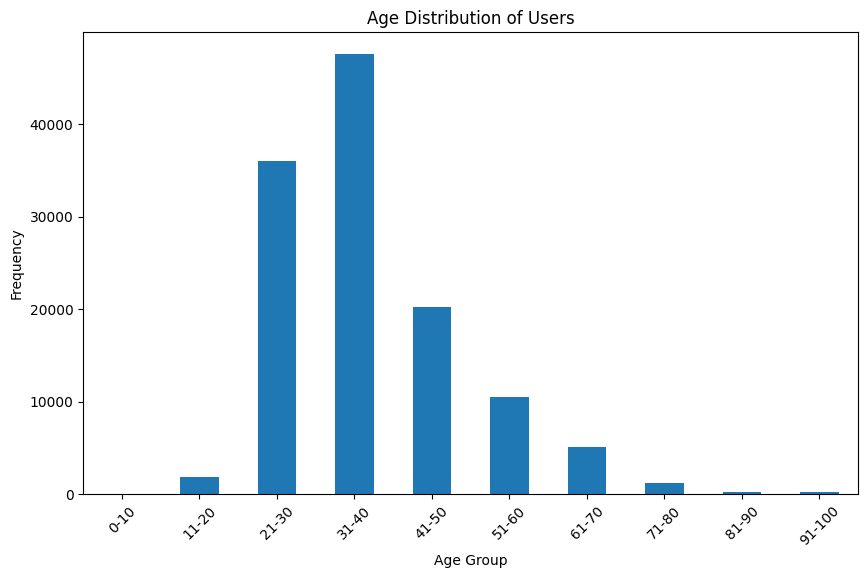

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
train_users['age_group'] = pd.cut(train_users['age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = train_users['age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Age Distribution of Users')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


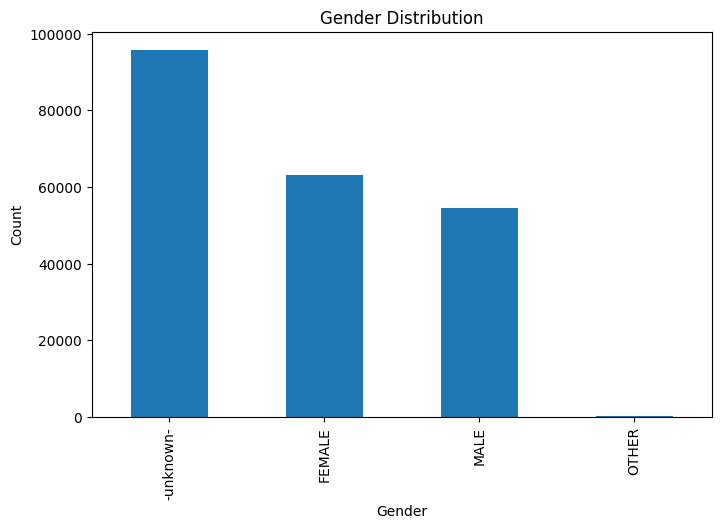

In [17]:
train_users['gender'].value_counts().plot(kind='bar',figsize=(8, 5))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


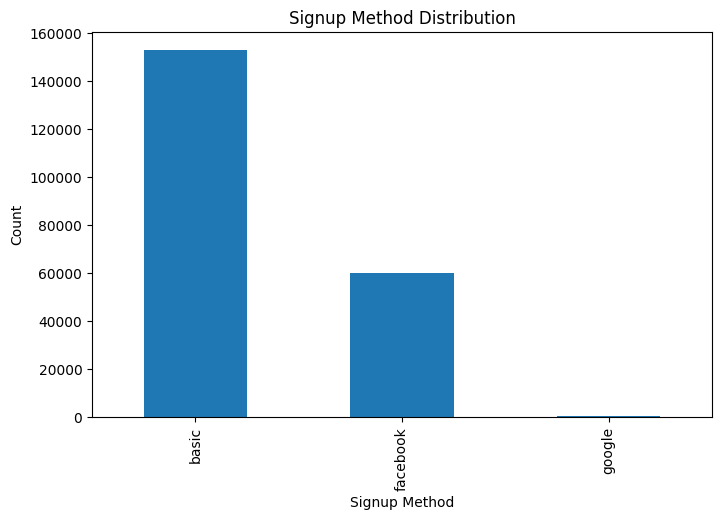

In [18]:
train_users['signup_method'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Signup Method Distribution')
plt.xlabel('Signup Method')
plt.ylabel('Count')
plt.show()


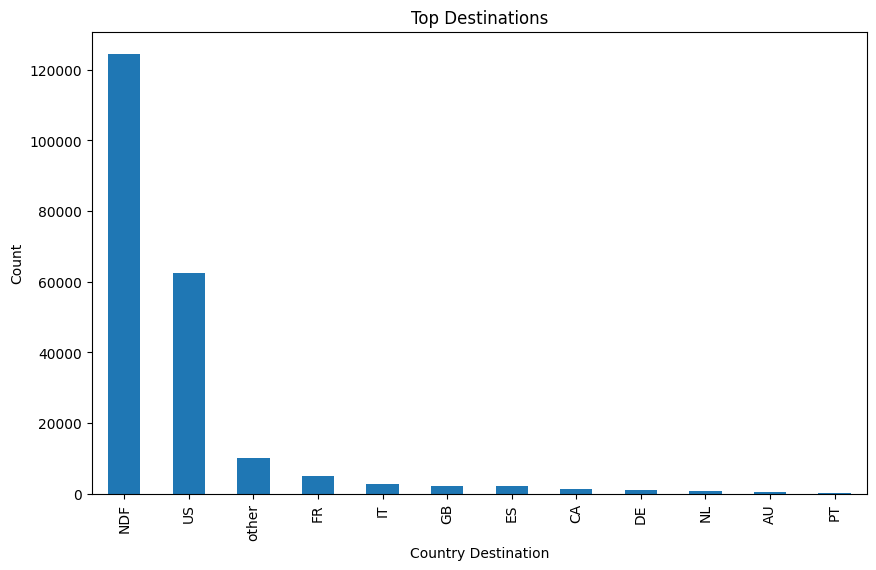

In [19]:
train_users['country_destination'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Top Destinations')
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.show()


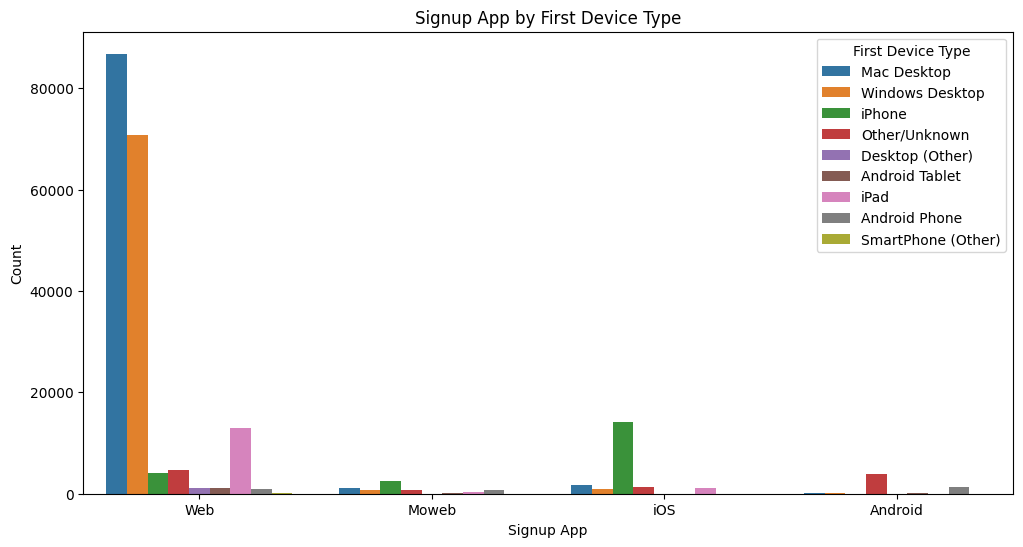

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=train_users, x='signup_app', hue='first_device_type')
plt.title('Signup App by First Device Type')
plt.xlabel('Signup App')
plt.ylabel('Count')
plt.legend(title='First Device Type')
plt.show()


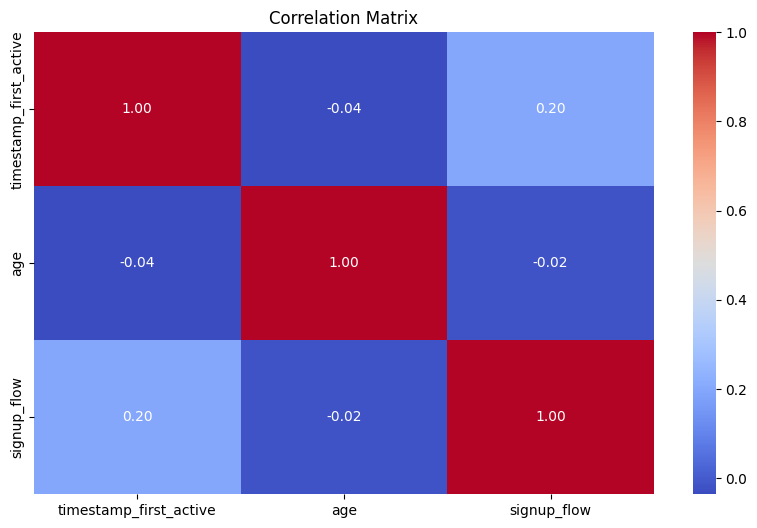

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_users.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

feature enginering and model training

In [22]:

X = train_users.drop(columns=['country_destination', 'id'])
y = train_users['country_destination']

# Converting the categorical target variable to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Converting into datatime
X_train['date_first_booking'] = pd.to_datetime(X_train['date_first_booking'], errors='coerce')
X_val['date_first_booking'] = pd.to_datetime(X_val['date_first_booking'], errors='coerce')
X_train['booking_year'] = X_train['date_first_booking'].dt.year
X_train['booking_month'] = X_train['date_first_booking'].dt.month
X_train['booking_day'] = X_train['date_first_booking'].dt.day
X_val['booking_year'] = X_val['date_first_booking'].dt.year
X_val['booking_month'] = X_val['date_first_booking'].dt.month
X_val['booking_day'] = X_val['date_first_booking'].dt.day
X_train = X_train.drop(columns=['date_first_booking'])
X_val = X_val.drop(columns=['date_first_booking'])

# Converting categorical columns to numeric
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)


X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

#Model training
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# XGBoost parameters
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'eta': 0.1,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'num_class': len(np.unique(y_encoded))
}

evals = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=True)

y_proba = model.predict(dval)

#Accuracy
y_pred_top1 = np.argmax(y_proba, axis=1)
accuracy = np.mean(y_pred_top1 == y_val)
print(f'Accuracy (Top-1): {accuracy:.4f}')

#NDCG
y_true = np.zeros(y_proba.shape)
y_true[np.arange(y_val.size), y_val] = 1
ndcg = ndcg_score(y_true, y_proba, k=5)
print(f'NDCG Score (Top-5): {ndcg:.4f}')




[0]	train-mlogloss:2.03257	validation-mlogloss:2.03321
[1]	train-mlogloss:1.77124	validation-mlogloss:1.77227
[2]	train-mlogloss:1.58309	validation-mlogloss:1.58441
[3]	train-mlogloss:1.43654	validation-mlogloss:1.43811
[4]	train-mlogloss:1.31750	validation-mlogloss:1.31926
[5]	train-mlogloss:1.21809	validation-mlogloss:1.22004
[6]	train-mlogloss:1.13366	validation-mlogloss:1.13582
[7]	train-mlogloss:1.06092	validation-mlogloss:1.06325
[8]	train-mlogloss:0.99782	validation-mlogloss:1.00033
[9]	train-mlogloss:0.94258	validation-mlogloss:0.94524
[10]	train-mlogloss:0.89395	validation-mlogloss:0.89677
[11]	train-mlogloss:0.85094	validation-mlogloss:0.85392
[12]	train-mlogloss:0.81279	validation-mlogloss:0.81594
[13]	train-mlogloss:0.77881	validation-mlogloss:0.78214
[14]	train-mlogloss:0.74856	validation-mlogloss:0.75201
[15]	train-mlogloss:0.72150	validation-mlogloss:0.72511
[16]	train-mlogloss:0.69731	validation-mlogloss:0.70105
[17]	train-mlogloss:0.67565	validation-mlogloss:0.67952
[1

In [23]:
# Test data preprocessing
test_users['date_first_booking'] = pd.to_datetime(test_users['date_first_booking'], errors='coerce')
test_users['booking_year'] = test_users['date_first_booking'].dt.year
test_users['booking_month'] = test_users['date_first_booking'].dt.month
test_users['booking_day'] = test_users['date_first_booking'].dt.day
test_users = test_users.drop(columns=['date_first_booking'], errors='ignore')
test_users_encoded = pd.get_dummies(test_users, drop_first=True)
X_test, _ = test_users_encoded.align(X_train, join='right', axis=1, fill_value=0)
dtest = xgb.DMatrix(X_test)
test_proba = model.predict(dtest)

# Removing NDF after prediction
ndf_index = label_encoder.transform(['NDF'])[0]

def adjust_probabilities(probas, ndf_index):
    probas[:, ndf_index] = 0
    probas = probas / probas.sum(axis=1, keepdims=True)
    return probas

adjusted_proba = adjust_probabilities(test_proba, ndf_index)
def get_top_k_excluding_ndf(probas, ndf_index, k=5):
    probas[:, ndf_index] = 0
    top_k_predictions = np.argsort(probas, axis=1)[:, -k:][:, ::-1]
    return top_k_predictions

top_5_predictions = get_top_k_excluding_ndf(adjusted_proba, ndf_index, k=5)
top_5_labels = label_encoder.inverse_transform(top_5_predictions.flatten()).reshape(-1, 5)


In [24]:
#submission
submission = pd.DataFrame({
    'id': test_users['id'],
    'country_1': top_5_labels[:, 0],
    'country_2': top_5_labels[:, 1],
    'country_3': top_5_labels[:, 2],
    'country_4': top_5_labels[:, 3],
    'country_5': top_5_labels[:, 4]
})


In [25]:
print(submission.head())

           id country_1 country_2 country_3 country_4 country_5
0  5uwns89zht        US        FR        CA        GB     other
1  jtl0dijy2j        US     other        FR        GB        CA
2  xx0ulgorjt        US     other        FR        CA        GB
3  6c6puo6ix0        US     other        FR        CA        IT
4  czqhjk3yfe        US     other        FR        CA        GB
